In [1]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import numpy as np
#from numpy import random
#np.random.seed(42) # Set seed for reproducibility

from scipy.stats import chi2, gamma
from scipy.special import erfcinv
from scipy.linalg import sqrtm

import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git, os

In [2]:
def calculate_R_CM(vectors):
    num_vectors = len(vectors)
    R_CM = np.sum(vectors, axis=0) / num_vectors
    return R_CM

def beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3):
    """
    Calculate the beta parameter for the given distributions.
    
    Parameters:
    diff_mean_1, diff_mean_2, diff_mean_3: Mean differences for each distribution.
    cov_1, cov_2, cov_3: Covariance matrices for each distribution.
    
    Returns:
    beta: The beta parameter.
    """
    
    beta = np.dot(diff_mean_1, np.linalg.solve(cov_1, diff_mean_1)) + \
           np.dot(diff_mean_2, np.linalg.solve(cov_2, diff_mean_2)) + \
           np.dot(diff_mean_3, np.linalg.solve(cov_3, diff_mean_3))
           
    
    return beta

'''
def Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):
    
    # Sampling
    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)
    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)
    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)

    r_tot = X + Y + Z

    # Compute W for each sample
    Q = np.zeros(n_samples)  # Initialize W
    for i in range(n_samples):
        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)

    return Q / L**2
'''


'\ndef Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):\n    \n    # Sampling\n    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)\n    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)\n    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)\n\n    r_tot = X + Y + Z\n\n    # Compute W for each sample\n    Q = np.zeros(n_samples)  # Initialize W\n    for i in range(n_samples):\n        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)\n\n    return Q / L**2\n'

# Dataset A

PTE = 5.0534955112936e-13
$N_\sigma_Q$ = 7.2238528087121985
PTE = 2.412498472481748e-24
$N_\sigma_beta$ = 10.180927894245258


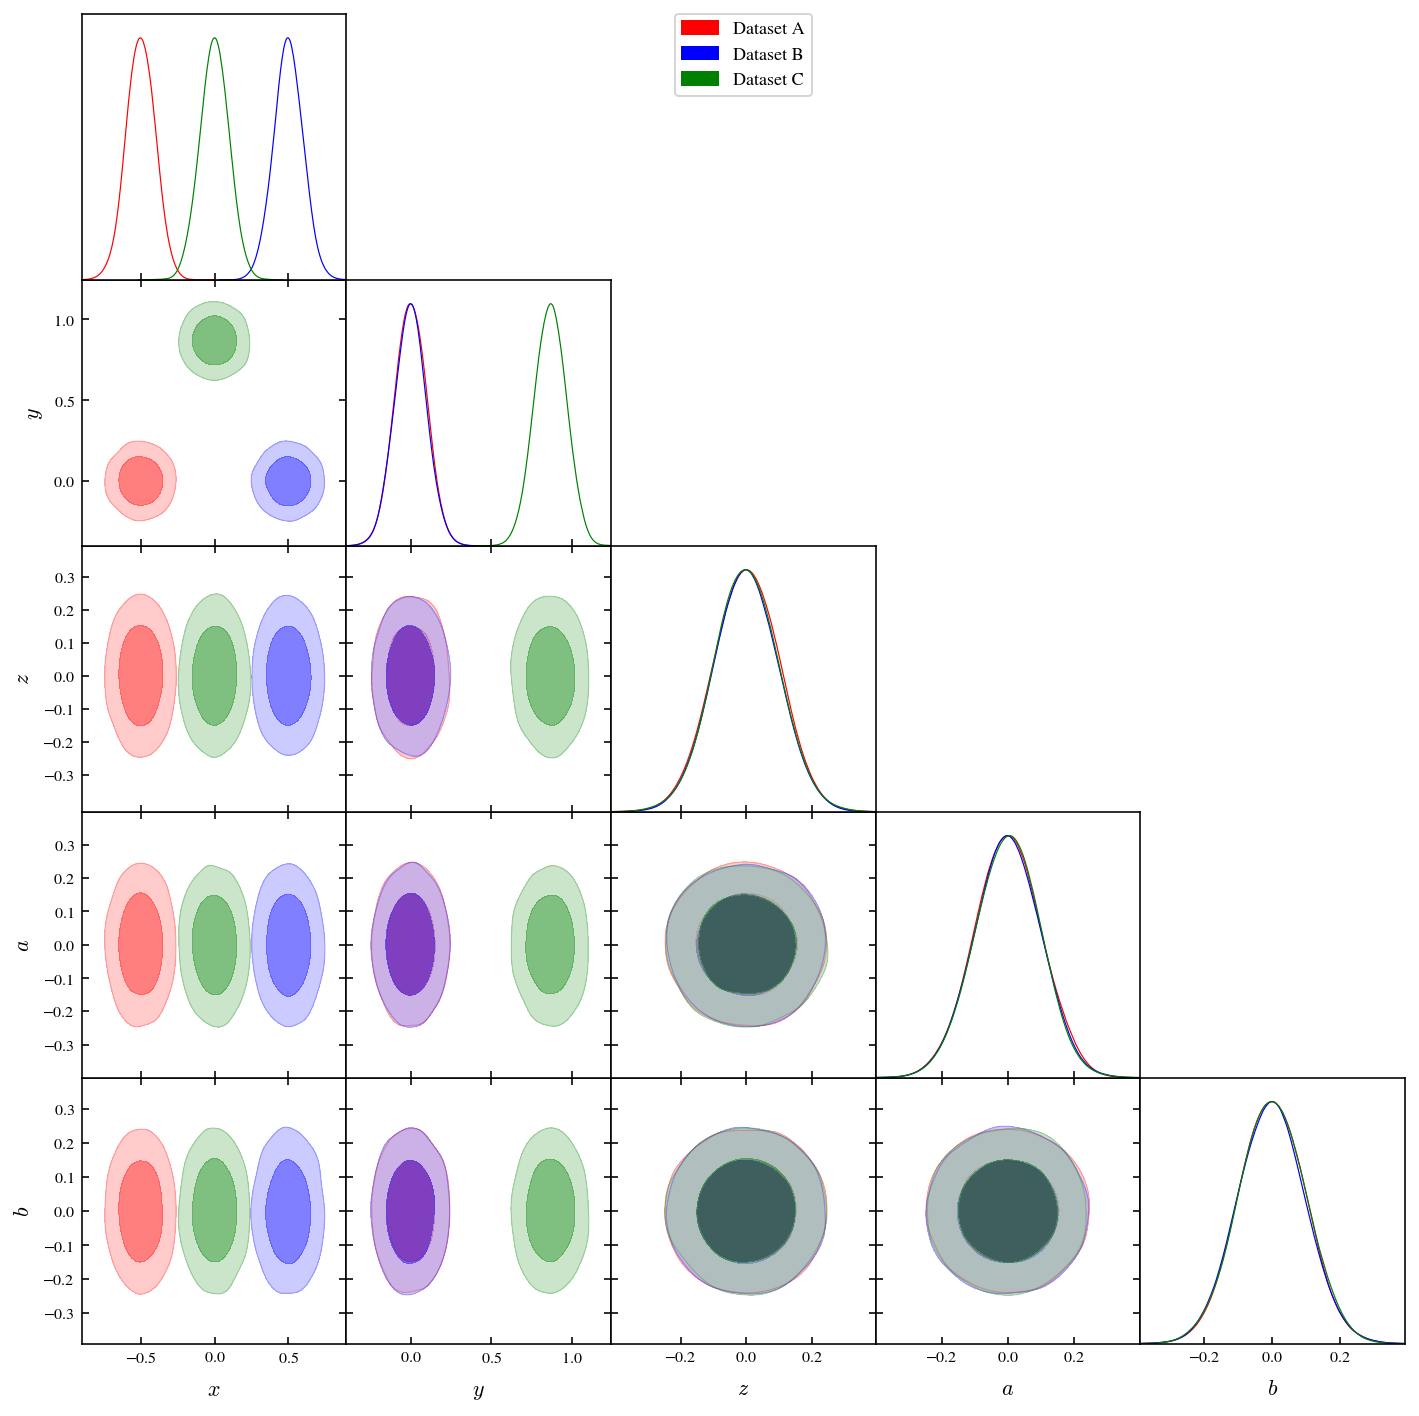

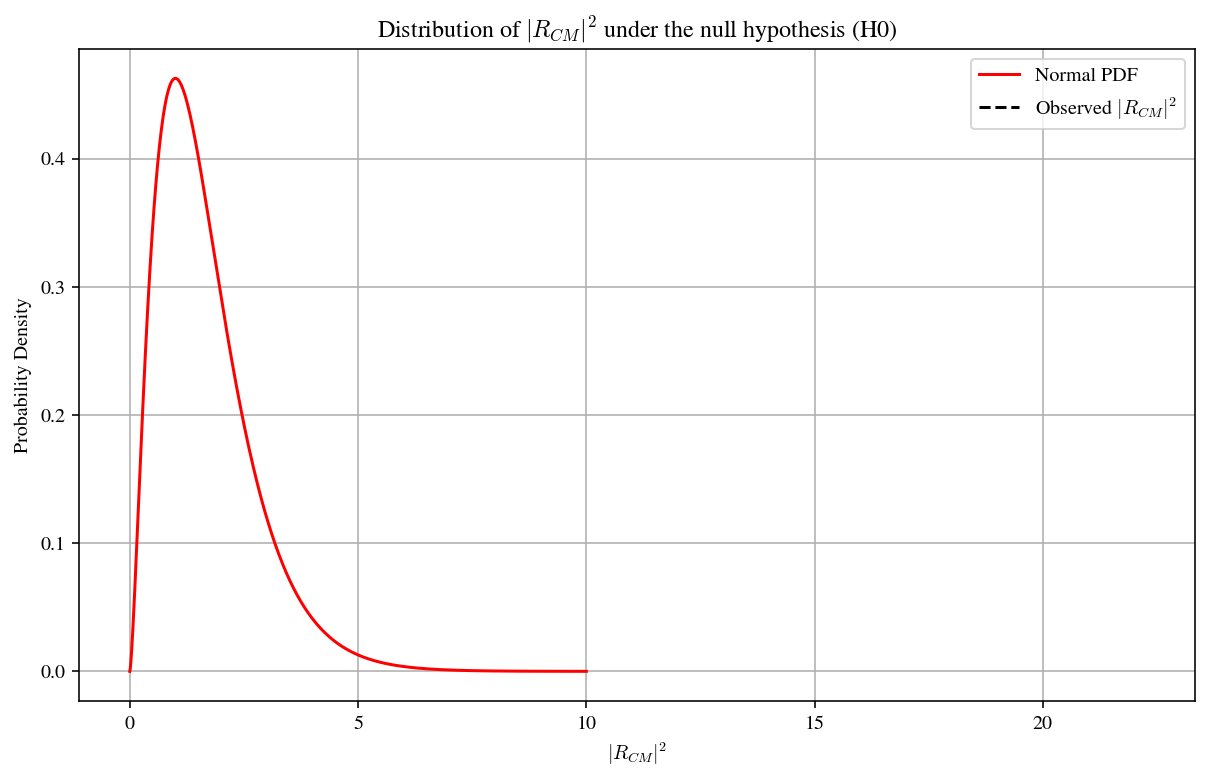

In [3]:
# Fixed constants
# Parameters
d = 5  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

mean_A = np.array([-1/2., 0., 0., 0., 0.]) 
mean_B = np.array([1/2, 0., 0., 0., 0.])
mean_C = np.array([0, np.sqrt(3)/2., 0., 0., 0.])

cov_A = np.eye(5) * 0.01
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y', 'z', 'a', 'b']
labels = ['x', 'y', 'z', 'a', 'b']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*L).sf(beta_statistic(diff_mean_1, diff_mean_2,
                                  diff_mean_3, cov_1, cov_2, cov_3))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset B

PTE = 0.24663415218605245
$N_\sigma_Q$ = 1.1585635045923934
PTE = 0.4514172112257256
$N_\sigma_beta$ = 0.7530544224571588


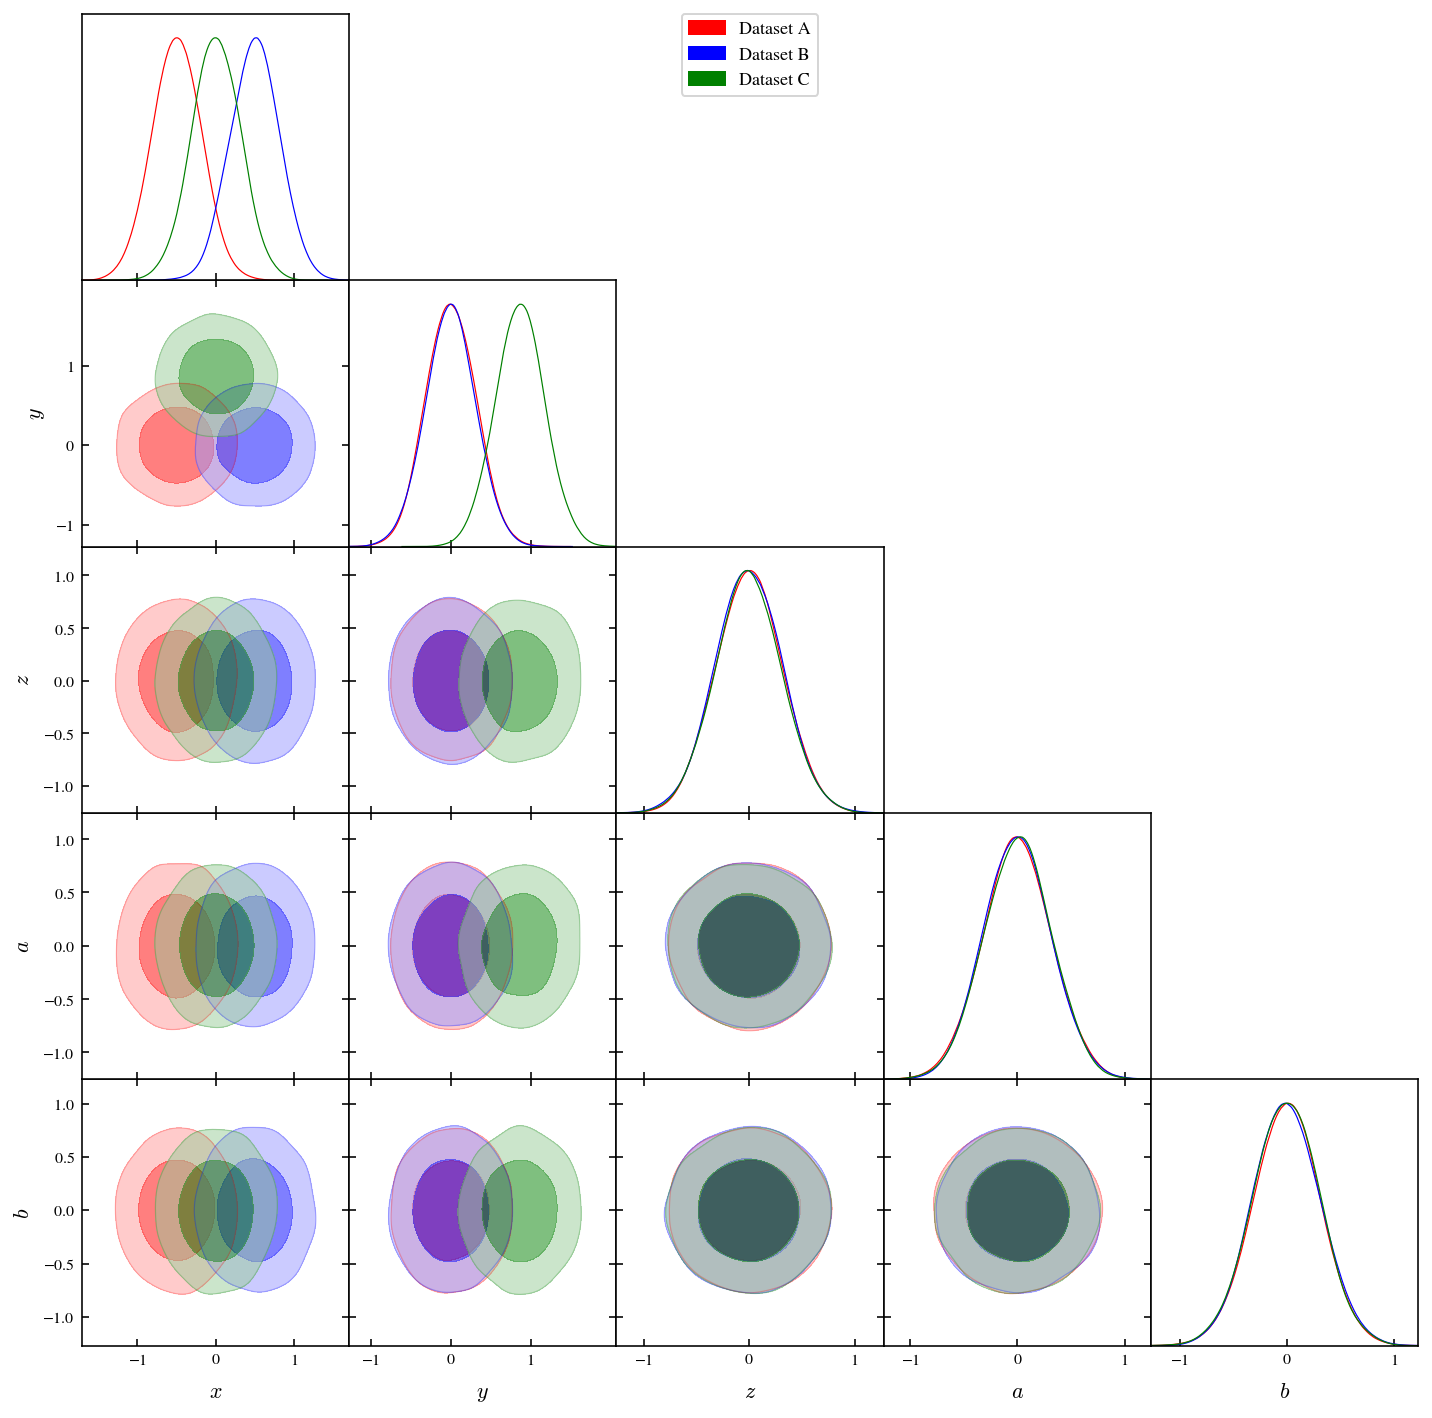

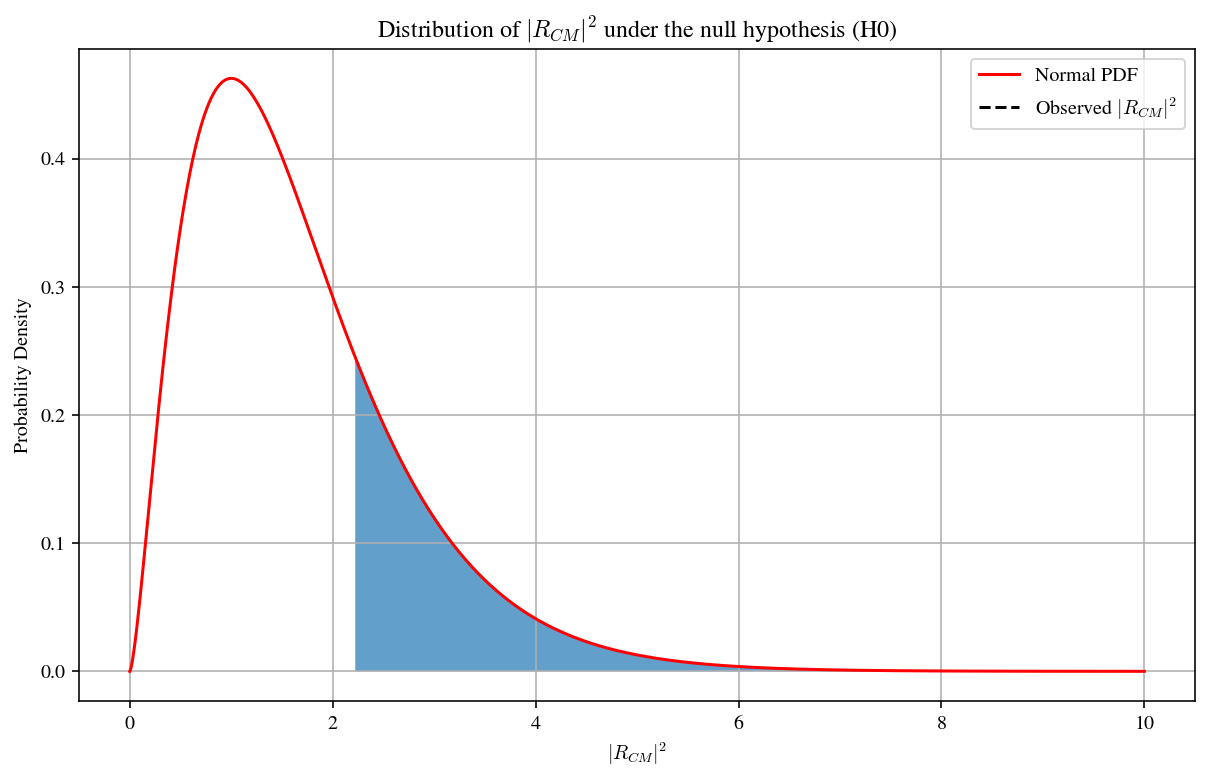

In [4]:
# Fixed constants
# Parameters
d = 5  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

mean_A = np.array([-1/2., 0., 0., 0., 0.]) 
mean_B = np.array([1/2, 0., 0., 0., 0.])
mean_C = np.array([0, np.sqrt(3)/2., 0., 0., 0.])

cov_A = 10*np.eye(5) * 0.01
cov_B = cov_A.copy()
cov_C = cov_A.copy()


samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y', 'z', 'a', 'b']
labels = ['x', 'y', 'z', 'a', 'b']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*L).sf(beta_statistic(diff_mean_1, diff_mean_2,
                                  diff_mean_3, cov_1, cov_2, cov_3))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset C

PTE = 0.24538633216064992
$N_\sigma_Q$ = 1.1616286675366068
PTE = 0.9946804287488183
$N_\sigma_beta$ = 0.00666714324654121
PTE = 0.9946804287488183
$N_\sigma_alpha$ = 0.00666714324654121


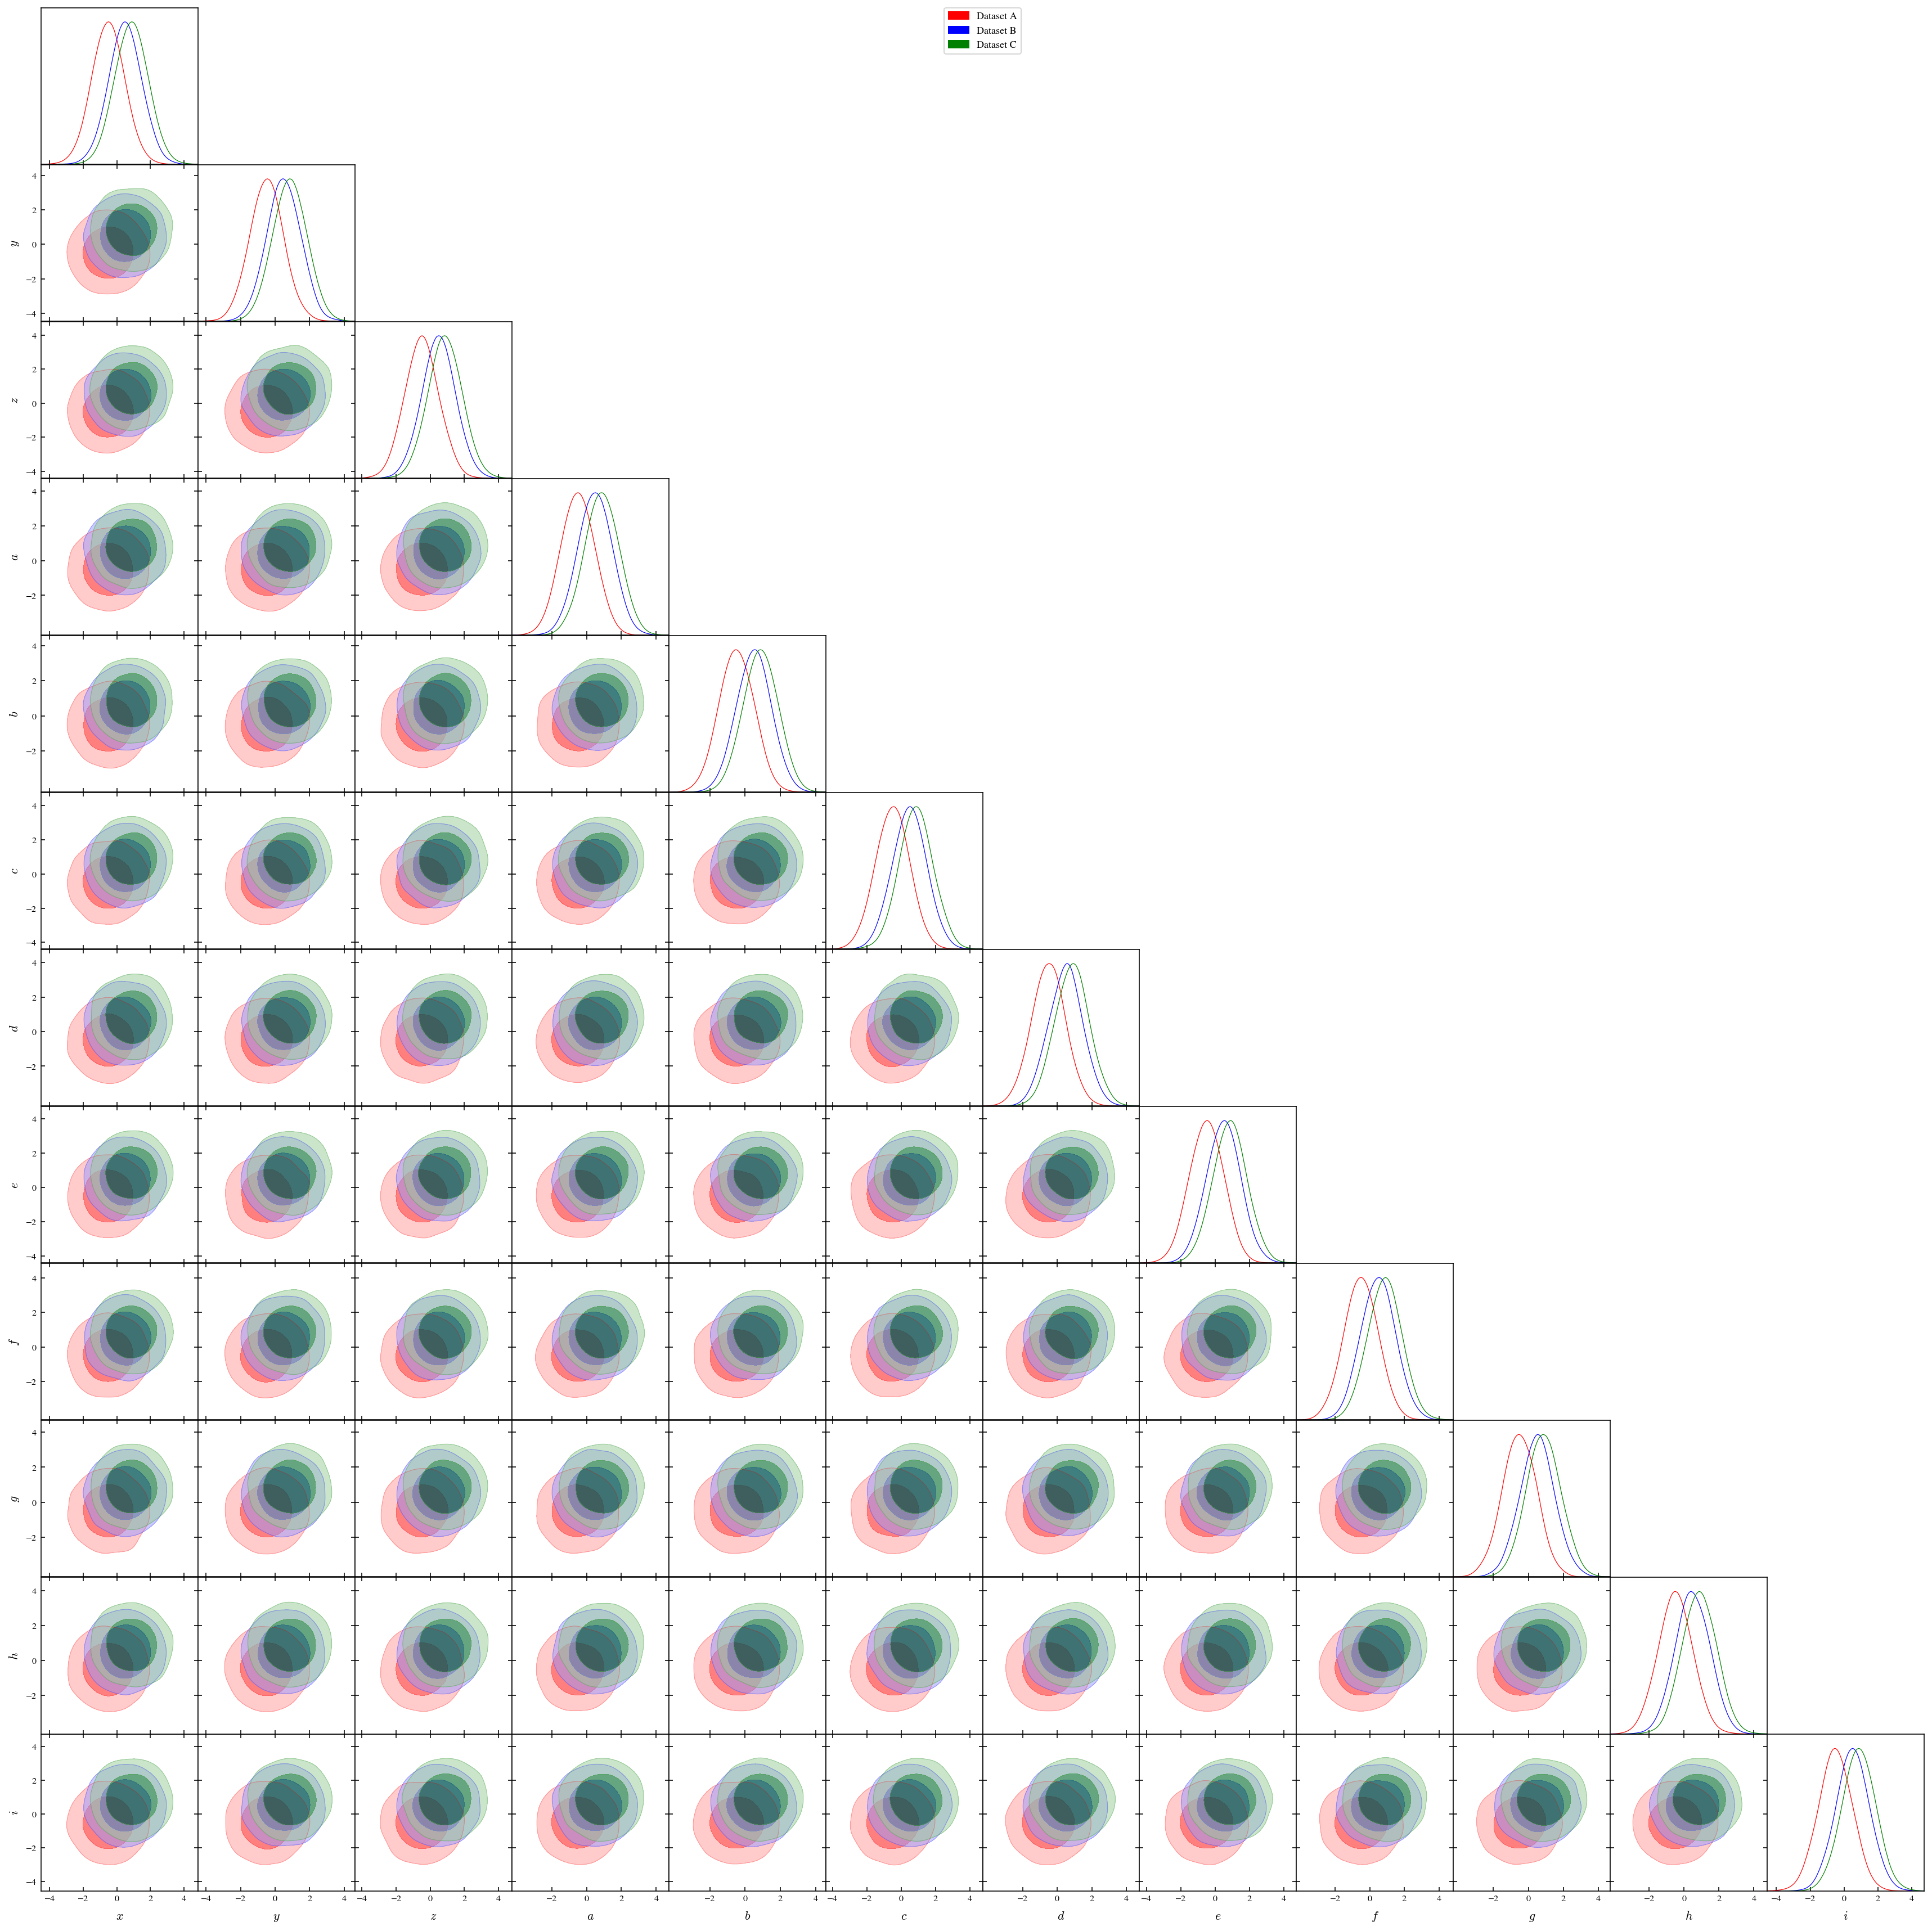

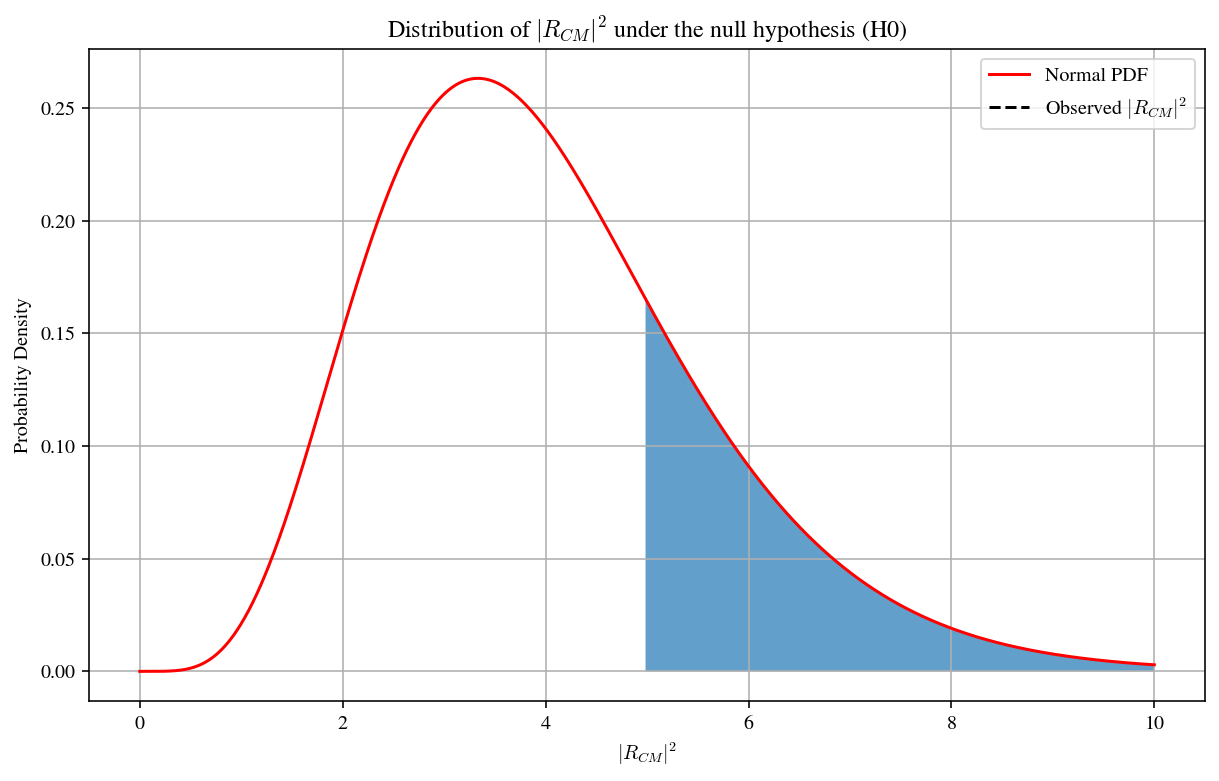

In [ ]:
# Fixed constants
# Parameters
d = 12  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

mean_A = np.ones(d) * -1/2 
mean_B = np.ones(d) * 1/2
mean_C = np.ones(d) * np.sqrt(3)/2.

cov_A = np.eye(12)
cov_B = cov_A.copy() 
cov_C = cov_A.copy() 


samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
labels = ['x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*L).sf(np.sum(np.linalg.norm(vectors,axis=1)**2))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

PTE = gamma(a=d*L/2, scale=2/L).sf(np.sum(np.linalg.norm(vectors,axis=1)**2)/L)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_alpha$ = {n_sigma}')



# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

PTE = 0.0011002107590352677
$N_\sigma_Q$ = 3.26356208447662
PTE = 1.0
$N_\sigma_alpha$ = -0.0
PTE = 0.9993236204925605
$N_\sigma_beta$ = 0.000847716100395712


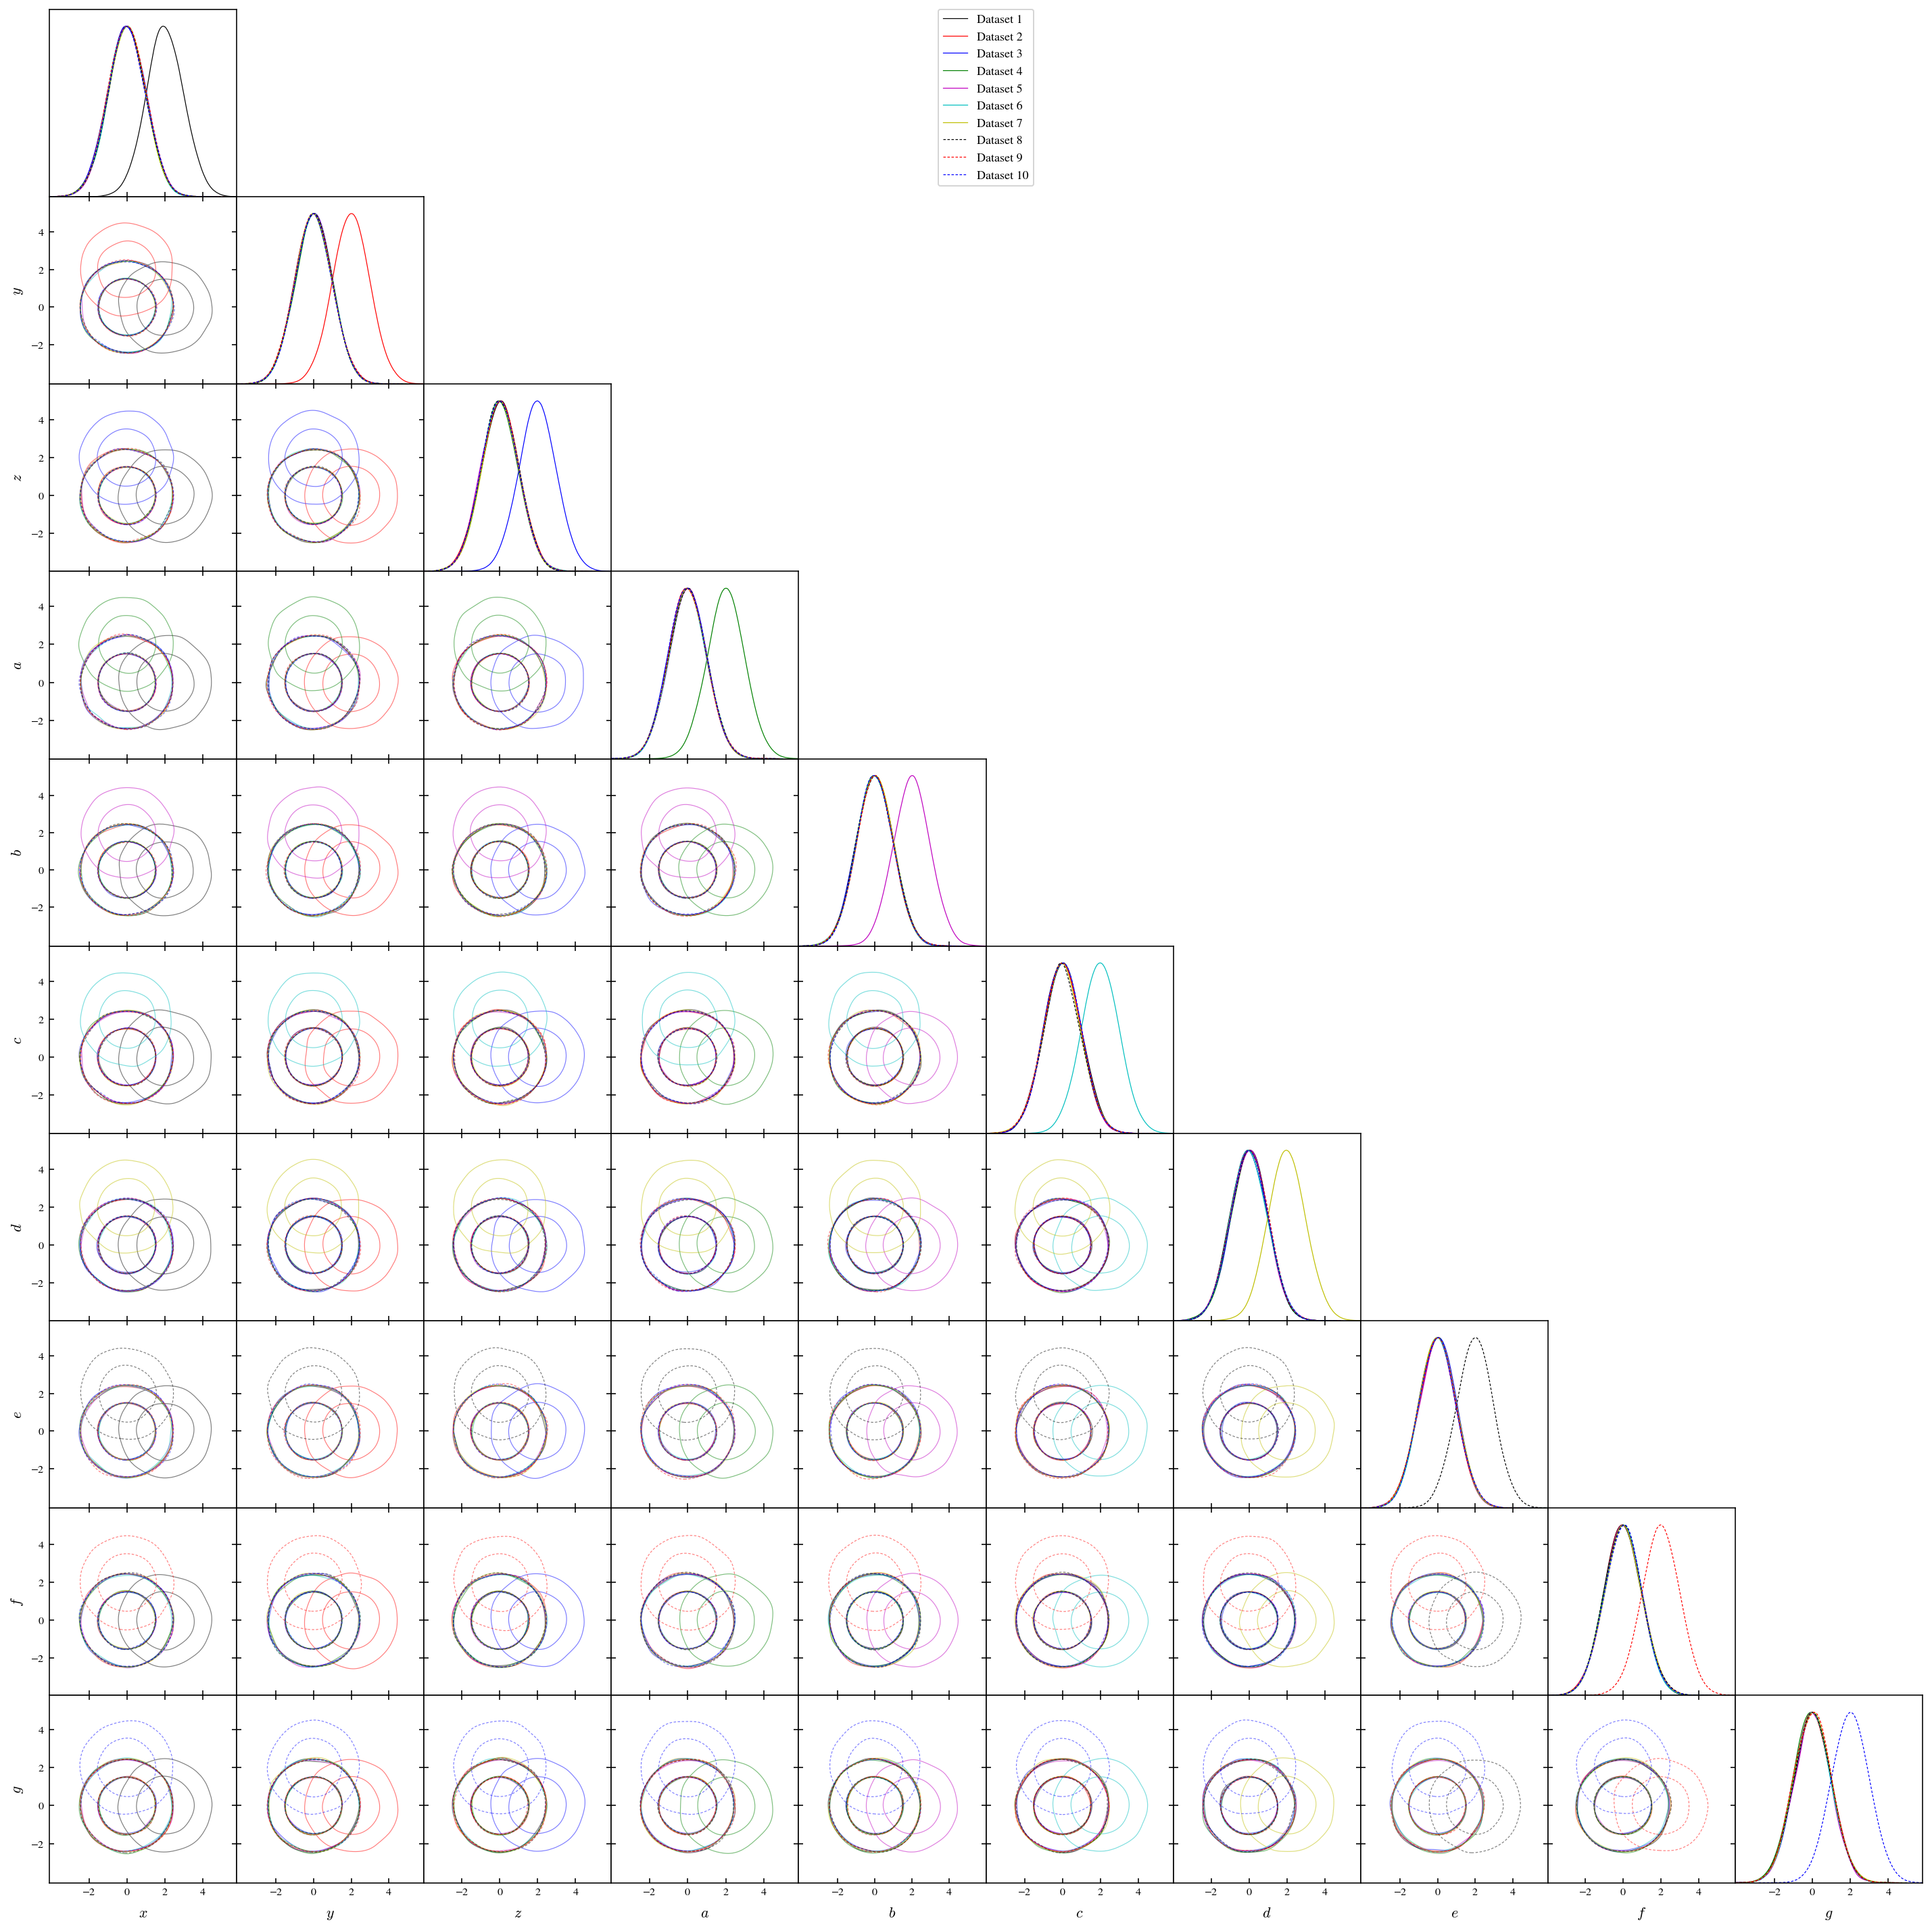

In [38]:
# Crear N vectores canónicos en D dimensiones
d = 10  # Dimensión
N = d  # Número de vectores canónicos
L = int(N*(N-1)/2)  # Number of tension vectors


canonical_means = [2*np.eye(d)[i] for i in range(N)]

# Crear covarianzas identidad correspondientes
covariances = [np.eye(d) for _ in range(N)]


vectors = []
for i in range(len(canonical_means)):
    for j in range(i + 1, len(canonical_means)):
        diff_mean_ij = canonical_means[i] - canonical_means[j]
        vectors.append(diff_mean_ij)
vectors = np.array(vectors)

R_CM = calculate_R_CM(vectors)

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')


#PTE = gamma(a=d*L/2, scale=2/L).sf(2)
PTE = gamma(a=d*L/2, scale=2).sf(np.sum(np.linalg.norm(vectors,axis=1)**2)/L)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_alpha$ = {n_sigma}')

#PTE = chi2(d*L).sf(2*L)
PTE = chi2(d*L).sf(np.sum(np.linalg.norm(vectors,axis=1)**2))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

chains = []
for i, (mean, cov) in enumerate(zip(canonical_means, covariances)):
    samples = np.random.multivariate_normal(mean, cov, size=10000)
    chain = MCSamples(samples=samples, names=['x', 'y', 'z','a','b','c','d','e','f','g'], labels=['x', 'y', 'z','a','b','c','d','e','f','g'], label=f'Dataset {i+1}')
    chains.append(chain)


# Plot the distributions using getdist
g = plots.get_subplot_plotter()
g.triangle_plot(chains, 
                #filled=True, 
                contour_args={'alpha': 0.5})
